Importing all required libraries

In [2]:
# Import all required libraries here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import re
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import confusion_matrix


Reading CSV File

In [3]:
#reading csv file ( MP2_Data.csv)
csv_path = "MP2_Data.csv"
df = pd.read_csv(csv_path)

#displaying the size of data
print("Total number of data:", df.shape[0])

#printing csv file
df.head()

Total number of data: 107


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


# Step 1: Data Processing

In [4]:
#Checking for null values
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [5]:
#getting features from csv file
features = df.columns.tolist()

#printing the features
print("\nFeatures:")
print(features)


Features:
['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade']


In [6]:
#Get columns with varying values (more than one unique value)
columns_with_varying_values = [col for col in df.columns if len(df[col].value_counts()) > 1]

#Update the dataframe with selected columns
df = df[columns_with_varying_values]

In [7]:
#displaying column after removing Week1_Stat1
#getting features from csv file
features = df.columns.tolist()

#printing the features
print("\nFeatures:")
print(features)


Features:
['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade']


In [8]:
#checking for balanced dataset
df['Grade'].value_counts()

0    48
4    24
3    17
5    13
2     5
Name: Grade, dtype: int64

In [9]:
#defining the columns to exclude
exclude_columns = ['ID', 'Grade', 'is_train']

#defining grade columns
grade_columns = ["Week2_Quiz1", "Week3_MP1", "Week3_PR1", "Week4_Quiz2", "Week5_MP2", "Week5_PR2", "Week6_Quiz3", "Week7_MP3", "Week7_PR3","Week8_Total"]

#getting the feature columns excluding the specified columns
feature_columns = [col for col in df.columns if col not in exclude_columns]

#grouping columns based on their types (Stat0, Stat1, Stat2, Stat3)
grouped_columns = {}
for col in feature_columns:
    col_parts = col.split('_')
    if len(col_parts) >= 2 and col_parts[1].startswith('Stat'):
        col_type = col_parts[1]
        grouped_columns.setdefault(col_type, []).append(col)

#creating new columns by summing up columns within each group
for col_type, cols in grouped_columns.items():
    df[f'stat{col_type[-1]}'] = df[cols].sum(axis=1)

#creating the filtered feature columns list
filtered_feature_columns = grade_columns + [f'stat{i}' for i in range(4)]

#printing the filtered feature columns
print(filtered_feature_columns)

['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week4_Quiz2', 'Week5_MP2', 'Week5_PR2', 'Week6_Quiz3', 'Week7_MP3', 'Week7_PR3', 'Week8_Total', 'stat0', 'stat1', 'stat2', 'stat3']


In [10]:
#showing correlation after adding column stat[i]
df.corr(method='pearson')

<ipython-input-10-62ab4569f69e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,stat0,stat2,stat3,stat1
Week2_Quiz1,1.000000,0.739992,0.723109,0.677371,0.710990,0.635804,0.622655,0.746331,0.695119,0.739192,...,0.235174,0.472536,0.436145,0.213437,0.045046,0.689783,0.532569,0.145670,0.287825,0.656842
Week3_MP1,0.739992,1.000000,0.962502,0.905769,0.964849,0.881352,0.834397,0.879998,0.912700,0.965074,...,0.268698,0.549969,0.518334,0.154754,0.099824,0.901788,0.724865,0.166744,0.438076,0.825256
Week3_PR1,0.723109,0.962502,1.000000,0.890706,0.942896,0.868638,0.830599,0.904170,0.906560,0.952095,...,0.185638,0.561184,0.489662,0.170683,0.085965,0.887352,0.688918,0.164004,0.393053,0.802498
Week5_MP2,0.677371,0.905769,0.890706,1.000000,0.932880,0.904458,0.874247,0.808479,0.847296,0.962302,...,0.204243,0.581338,0.455110,0.149925,0.097039,0.953488,0.745104,0.181142,0.446041,0.806646
Week5_PR2,0.710990,0.964849,0.942896,0.932880,1.000000,0.897020,0.854744,0.863713,0.887432,0.968613,...,0.245074,0.549798,0.522180,0.165532,0.084738,0.907837,0.723595,0.160648,0.419089,0.818621
Week7_MP3,0.635804,0.881352,0.868638,0.904458,0.897020,1.000000,0.807097,0.781677,0.814492,0.957955,...,0.225299,0.480964,0.503761,0.099568,0.053977,0.968130,0.671216,0.106040,0.362409,0.757514
Week7_PR3,0.622655,0.834397,0.830599,0.874247,0.854744,0.807097,1.000000,0.785238,0.814822,0.883680,...,0.274266,0.570810,0.569017,0.190900,0.104765,0.865616,0.693708,0.152256,0.411345,0.750541
Week4_Quiz2,0.746331,0.879998,0.904170,0.808479,0.863713,0.781677,0.785238,1.000000,0.912396,0.884461,...,0.258997,0.480060,0.418012,0.157015,0.060867,0.810920,0.606911,0.129136,0.376748,0.774484
Week6_Quiz3,0.695119,0.912700,0.906560,0.847296,0.887432,0.814492,0.814822,0.912396,1.000000,0.910623,...,0.274749,0.495457,0.452735,0.173820,0.094437,0.849920,0.684053,0.178740,0.423126,0.826876
Week8_Total,0.739192,0.965074,0.952095,0.962302,0.968613,0.957955,0.883680,0.884461,0.910623,1.000000,...,0.249535,0.559333,0.521482,0.152608,0.083350,0.972348,0.734958,0.155891,0.424907,0.833979


# Step 2: Training and Testing Dataset                                   
#        Dividing the available data in an appropriate proportion to train and test dataset.

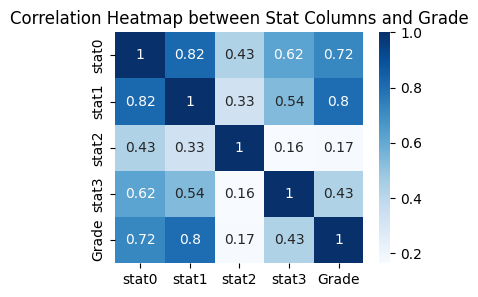

In [11]:
#Selecting the columns to be used for correlation analysis
cols_to_use = ['stat0', 'stat1', 'stat2', 'stat3', 'Grade']

#Calculating the correlation matrix
correlation_matrix = df[cols_to_use].corr()

#Creating a heatmap with annotations
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap between Stat Columns and Grade')
plt.show()

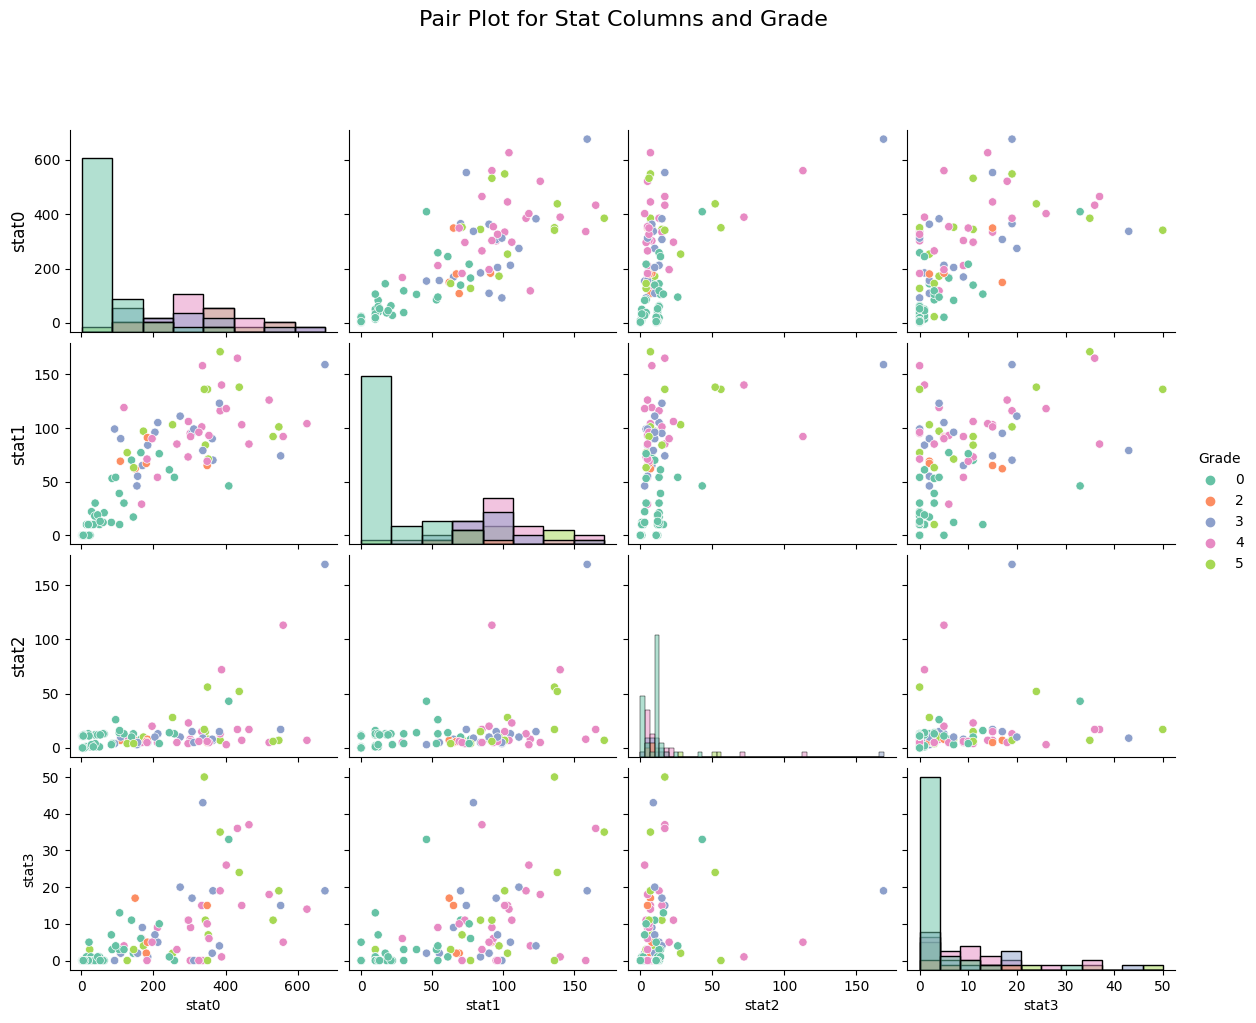

In [12]:
#Creating a pair plot with color differentiation based on 'Grade' column
pair_plot = sns.pairplot(data=df[cols_to_use], hue="Grade", diag_kind='hist', height=2.5, aspect=1.2, markers='o', palette='Set2')

#Customizing plot labels and title
pair_plot.fig.suptitle('Pair Plot for Stat Columns and Grade', y=1.02, size=16)

#Set x and y axis labels for each subplot (excluding the last row and last column)
for i, row in enumerate(pair_plot.axes[:-1]):
    for j, ax in enumerate(row):
        ax.set_xlabel(cols_to_use[j], fontsize=12)
        ax.set_ylabel(cols_to_use[i], fontsize=12)

#Adjusting the spacing between the plots and title
pair_plot.fig.subplots_adjust(top=0.9)

#Displaying the pair plot
plt.show()

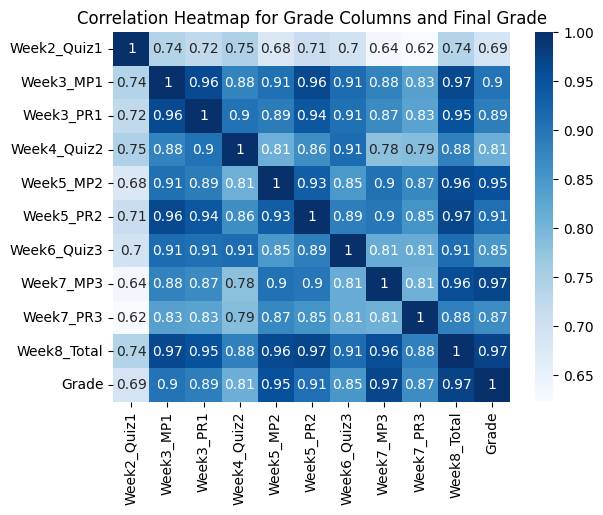

In [13]:
#selecting the columns to check correlation
cols_to_check = grade_columns + ['Grade']

#calculating the correlation matrix
correlation_matrix_check = df[cols_to_check].corr()

#creating a heatmap with annotations
#plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_check, annot=True, cmap='Blues')
plt.title('Correlation Heatmap for Grade Columns and Final Grade')
plt.show()

In [14]:
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,stat0,stat2,stat3,stat1
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,4,8,6,1,0,4,118,8,4,119
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,0,25,3,2,5,4,465,17,37,85
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,9,0,1,0,3,169,8,9,65
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,0,7,6,0,0,3,553,17,15,74
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,1,5,3,1,0,2,149,7,17,62


In [15]:
#putting the selected features in variable X and Y
X = df[filtered_feature_columns]
Y = df['Grade']

In [16]:
#using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Step 3: Model Training

# First Approach: Random Forest Classifier

In [17]:
#showing the no of observations in the training and testing dataset
print("Number of observation in training dataset:", len(X_train))
print("Number of observation in testing dataset:", len(X_test))

Number of observation in training dataset: 71
Number of observation in testing dataset: 36


In [18]:
##creating a random forest classifier
#clf means Classifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)

#training the classifier to train features and learn how they relate
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [19]:
#Get feature importances
feature_importances = sorted(
    list(zip(X, abs(clf.feature_importances_))),
    key=lambda x: x[1],
    reverse=True
)

feature_importances

[('Week8_Total', 0.2756230930550429),
 ('Week7_MP3', 0.15987089176924818),
 ('Week5_MP2', 0.12473456438069419),
 ('Week3_MP1', 0.0817083275497496),
 ('Week5_PR2', 0.06411767872908099),
 ('Week7_PR3', 0.04645613865509697),
 ('Week4_Quiz2', 0.04509191456034697),
 ('Week3_PR1', 0.04388044849774108),
 ('stat0', 0.042769986880753647),
 ('stat1', 0.029653563427086457),
 ('stat3', 0.02360652243133024),
 ('stat2', 0.02102181070718108),
 ('Week2_Quiz1', 0.020807211060540884),
 ('Week6_Quiz3', 0.020657848296106677)]

In [20]:
#Select features based on the threshold (e.g., 0.07)
total_features = [col[0] for col in feature_importances if col[1] > 0.07]

#displaying total features
total_features

['Week8_Total', 'Week7_MP3', 'Week5_MP2', 'Week3_MP1']

In [21]:
#training model by filtered features
clf.fit(X_train[total_features],y_train)


RandomForestClassifier(n_jobs=2, random_state=0)

In [22]:
#applying the classifier we train to test data which it has never seen before
preds = clf.predict(X_test[total_features])

In [23]:
#viewing the predicted probabilities of the first 15 observations
clf.predict_proba(X_test[total_features])[0:15]

array([[0.  , 0.  , 0.03, 0.97, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.39, 0.59, 0.02, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.11, 0.89, 0.  ],
       [0.  , 0.04, 0.22, 0.7 , 0.04],
       [0.  , 0.1 , 0.88, 0.02, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.18, 0.69, 0.13],
       [0.  , 0.  , 0.16, 0.84, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

# Step 4 – Performance Evaluation

In [24]:
#viewing the actual grades
y_test.head()

76    4
10    0
4     2
99    0
70    4
Name: Grade, dtype: int64

In [25]:
# checking the predictions
pd.crosstab(y_test, preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])


Predicted Grade,0,2,3,4,5
Actual Grade,,,,,
0,16,0,0,0,0
2,0,1,2,0,0
3,0,0,4,0,0
4,0,0,0,8,0
5,0,0,0,0,5


In [26]:
#computing accuracy score for the model to evaluate the model performance
print(classification_report(y_test, preds))
random_accuracy = accuracy_score(y_test, preds)
print("Accuracy: ", random_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           2       1.00      0.33      0.50         3
           3       0.67      1.00      0.80         4
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5

    accuracy                           0.94        36
   macro avg       0.93      0.87      0.86        36
weighted avg       0.96      0.94      0.94        36

Accuracy:  0.9444444444444444


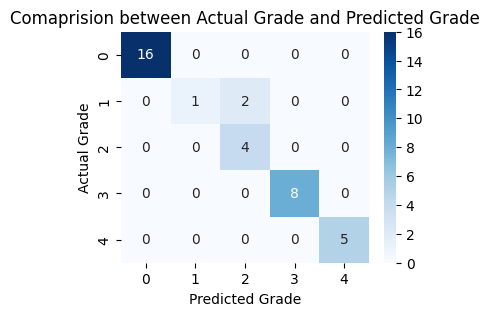

In [27]:
#Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

#Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=range(conf_matrix.shape[1]),
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Grade')
plt.ylabel('Actual Grade')
plt.title('Comaprision between Actual Grade and Predicted Grade')
plt.show()

In [28]:
#calculating length of preds
length = len(preds)
length

36

In [29]:
X_test['Predictions'] = preds.tolist()
X_test

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week4_Quiz2,Week5_MP2,Week5_PR2,Week6_Quiz3,Week7_MP3,Week7_PR3,Week8_Total,stat0,stat1,stat2,stat3,Predictions
76,5.00,15.0,5.0,4.17,17.83,5.00,5.0,28.24,5.0,90.24,196,90,20,5,4
10,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,10,0,1,0,0
4,0.00,15.0,5.0,4.67,12.17,4.93,5.0,15.91,5.0,67.68,149,62,7,17,3
99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,3,0,11,0,0
70,5.00,14.0,5.0,3.15,16.96,5.00,4.0,24.66,5.0,82.77,349,69,6,10,4
66,1.67,12.0,5.0,5.00,16.09,5.00,5.0,32.61,5.0,87.37,326,96,6,0,4
30,4.17,15.0,5.0,5.00,8.70,5.00,5.0,19.09,5.0,71.96,363,90,8,2,3
45,3.33,15.0,5.0,3.17,20.00,5.00,5.0,26.65,2.5,85.65,560,92,113,5,4
94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,3,0,11,0,0
11,3.33,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,3.33,144,17,13,2,0


In [30]:
#merging predicted data with original dataset
merge_preds = pd.merge(df,X_test, on=['stat0','stat1','stat2','stat3'])

#displaying top 15 lines of merged datasets
print((merge_preds).head(15))
print("\n")

            ID  Week2_Quiz1_x  Week3_MP1_x  Week3_PR1_x  Week5_MP2_x  \
0    ML-2020-1           5.00         15.0          5.0        16.09   
1    ML-2020-6           0.00         15.0          5.0        12.17   
2   ML-2020-14           5.00         12.0          5.0        12.17   
3   ML-2020-16           0.00          0.0          0.0         0.00   
4   ML-2020-17           3.33          0.0          0.0         0.00   
5   ML-2020-18           4.17         15.0          5.0        19.57   
6   ML-2020-23           5.00         15.0          5.0        18.70   
7   ML-2020-28           5.00          0.0          0.0         0.00   
8   ML-2020-33           3.33         13.0          5.0        13.33   
9   ML-2020-37           4.17         11.0          5.0        16.52   
10  ML-2020-42           4.17         15.0          5.0         8.70   
11  ML-2020-43           4.17         13.0          5.0        20.00   
12  ML-2020-45           1.67          0.0          0.0         

In [31]:
#saving file to csv
merge_preds.to_csv('rf_pred.csv', sep=',')


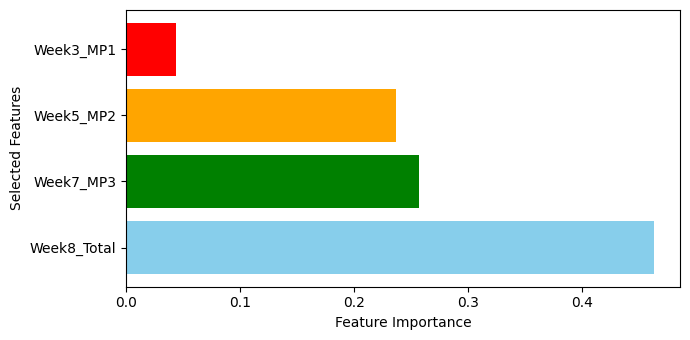

In [32]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Define custom colors for each bar
colors = ['skyblue', 'green', 'orange', 'red', 'purple']

# Plot horizontal bar chart with data points and custom colors
plt.barh(total_features, clf.feature_importances_, color=colors)

# Label the x-axis
plt.xlabel('Feature Importance')

# Label the y-axis
plt.ylabel('Selected Features')

# Display the plot
plt.show()

# Step 3: Seccond Approach: Naive Bayes Classifier

In [33]:
df.head(4)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,stat0,stat2,stat3,stat1
0,ML-2020-1,5.00,15.0,5.0,16.09,5.0,21.88,5.0,5.00,5.0,...,4,8,6,1,0,4,118,8,4,119
1,ML-2020-2,3.33,15.0,5.0,17.83,5.0,22.27,5.0,4.00,5.0,...,0,25,3,2,5,4,465,17,37,85
2,ML-2020-3,1.67,13.0,5.0,15.22,5.0,27.05,2.5,5.00,5.0,...,0,9,0,1,0,3,169,8,9,65
3,ML-2020-4,2.50,14.0,5.0,10.00,5.0,31.02,5.0,3.13,5.0,...,0,7,6,0,0,3,553,17,15,74


In [34]:
#initialize Gaussian Naive Bayes
clf_3 = GaussianNB()

#fitting the dataset for training
clf_3.fit(X_train[total_features],y_train)

GaussianNB()

# Step 4 – Performance Evaluation

In [35]:
#predicting the dataset for testing
clf_3_preds = clf_3.predict(X_test[total_features])

clf_3_preds


array([4, 0, 3, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 3, 3, 5, 4,
       3, 3, 3, 5, 3, 0, 5, 4, 0, 0, 3, 0, 0, 0])

In [36]:
# checking the predictions
pd.crosstab(y_test, clf_3_preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])


Predicted Grade,0,3,4,5
Actual Grade,,,,
0,15,1,0,0
2,0,3,0,0
3,0,4,0,0
4,0,1,7,0
5,0,0,1,4


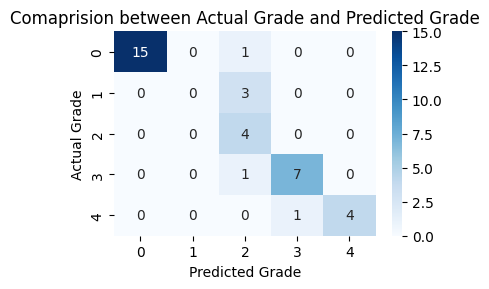

In [37]:
#Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, clf_3_preds)

#Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=range(conf_matrix.shape[1]),
            yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Grade')
plt.ylabel('Actual Grade')
plt.title('Comaprision between Actual Grade and Predicted Grade')
plt.show()

In [38]:
#prediction probability
clf_3_prob = clf_3.predict_proba(X_test[total_features])

In [39]:
#calculating length
length2 = len(clf_3_preds)
length2

36

In [40]:
#creating the prediction file by concatenation between original and predicted dataset
#reshaping for concatenation
clf_3_preds_df = pd.DataFrame(clf_3_preds.reshape(length2,1))

#column renaming to indicate the predictions
clf_3_preds_df.rename(columns={0:'Predictions'}, inplace=True)
clf_3_preds_df

,Predictions
0,4
1,0
2,3
3,0
4,4
5,4
6,3
7,4
8,0
9,0


In [41]:
#creating a variable to store testting total features
x_validation_df = X_test[total_features]

x_validation_df

,Week8_Total,Week7_MP3,Week5_MP2,Week3_MP1
76,90.24,28.24,17.83,15.0
10,0.00,0.00,0.00,0.0
4,67.68,15.91,12.17,15.0
99,0.00,0.00,0.00,0.0
70,82.77,24.66,16.96,14.0
66,87.37,32.61,16.09,12.0
30,71.96,19.09,8.70,15.0
45,85.65,26.65,20.00,15.0
94,0.00,0.00,0.00,0.0
11,3.33,0.00,0.00,0.0


In [42]:
#concatenating the two pandas dataframes over the columns to create a prediction dataset
x_validation_df['Predictions'] = clf_3_preds.tolist()

x_validation_df

<ipython-input-42-669efe4ec16e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_validation_df['Predictions'] = clf_3_preds.tolist()


,Week8_Total,Week7_MP3,Week5_MP2,Week3_MP1,Predictions
76,90.24,28.24,17.83,15.0,4
10,0.00,0.00,0.00,0.0,0
4,67.68,15.91,12.17,15.0,3
99,0.00,0.00,0.00,0.0,0
70,82.77,24.66,16.96,14.0,4
66,87.37,32.61,16.09,12.0,4
30,71.96,19.09,8.70,15.0,3
45,85.65,26.65,20.00,15.0,4
94,0.00,0.00,0.00,0.0,0
11,3.33,0.00,0.00,0.0,0


In [43]:
#merging the prediction with original dataset
preds_comp = pd.merge(df,x_validation_df, on=['Week8_Total','Week7_MP3','Week5_MP2','Week3_MP1'])

#printing top 15 rows of data of final predictions
print((preds_comp).head(15))
print("\n")

            ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0    ML-2020-1          5.0       15.0        5.0      16.09       5.00   
1    ML-2020-6          0.0       15.0        5.0      12.17       4.93   
2    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
3    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
4    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
5    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
6    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
7    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
8    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
9    ML-2020-8          0.0        0.0        0.0       0.00       0.00   
10   ML-2020-8          0.0        0.0        0.0       0.00       0.00   
11   ML-2020-8          0.0        0.0        0.0       0.00       0.00   
12   ML-2020-8          0

In [44]:
#saving file to csv
preds_comp.to_csv('naive_prediction.csv', sep=',')

In [45]:
#model performance
#setting performance parameters
seed = 7
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

#calling the cross validation function
scoring = 'accuracy'
cv_results = model_selection.cross_val_score(GaussianNB(),X_train[total_features],y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
naive_accuracy = "%s: %f" % ('Naive Bayes Classifer Accuracy', cv_results.mean())

naive_accuracy

'Naive Bayes Classifer Accuracy: 0.889286'

In [46]:
#putting accuracy of both approach we used above
# Define a function to calculate accuracy score
def calculate_accuracy_score():
    # Calculate accuracy score for Random Forest
    accuracy_score_RF = random_accuracy
    msg1 = " %f " % accuracy_score_RF
    msg1 = float(msg1)
    return msg1

# Create a dictionary to store accuracy scores for different algorithms
accuracy_scores = {}

# Calculate accuracy score for Random Forest and add it to the dictionary
accuracy_scores['Random Forest'] = calculate_accuracy_score()

# Calculate accuracy score for Naive Bayes and add it to the dictionary
accuracy_scores['Naive Bayes'] = naive_accuracy

# Print the dictionary containing accuracy scores
print(accuracy_scores)

{'Random Forest': 0.944444, 'Naive Bayes': 'Naive Bayes Classifer Accuracy: 0.889286'}


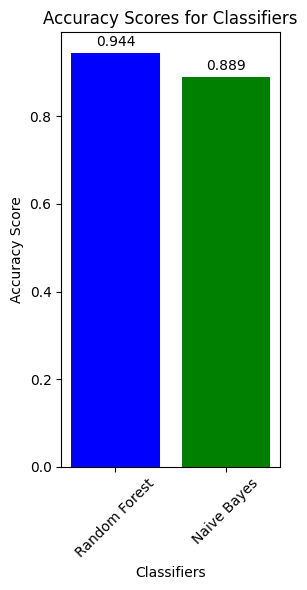

In [47]:
#plotting accuracy of both classifier
algo_list = ['Random Forest', 'Naive Bayes']
# Extract numerical value from the string and convert to float
naive_accuracy_value = float(re.findall(r"\d+\.\d+", naive_accuracy)[0])
random_accuracy_value = float(random_accuracy)

# Update list_Ascore with extracted numerical values
list_Ascore = [random_accuracy_value, naive_accuracy_value]

# Create a new figure with specific size and a rotated x-axis label
fig, ax = plt.subplots(figsize=(3.00, 6.00))

# Plot bar chart with data points
bars = ax.bar(algo_list, list_Ascore, color=['blue', 'green'])

# Set X and Y axis labels
ax.set_xlabel("Classifiers")
ax.set_ylabel("Accuracy Score")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the title of the plot
ax.set_title("Accuracy Scores for Classifiers")

# Annotate the bars with accuracy scores
for bar, score in zip(bars, list_Ascore):
    height = bar.get_height()
    ax.annotate(f'{score:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

# Step 5: Important Features

In [48]:
#identifying important features
print("Important features in predictions: ", total_features)
sorted_feature_importance_scores = sorted(feature_importances, key=lambda x: x[1], reverse=True)
print(pd.DataFrame([{'feature': col[0], "score": col[1]} for col in sorted_feature_importance_scores]))
top3_features = [col[0] for col in sorted_feature_importance_scores][:3]

print("\n\nThe top three features are: ", top3_features)


Important features in predictions:  ['Week8_Total', 'Week7_MP3', 'Week5_MP2', 'Week3_MP1']
        feature     score
0   Week8_Total  0.275623
1     Week7_MP3  0.159871
2     Week5_MP2  0.124735
3     Week3_MP1  0.081708
4     Week5_PR2  0.064118
5     Week7_PR3  0.046456
6   Week4_Quiz2  0.045092
7     Week3_PR1  0.043880
8         stat0  0.042770
9         stat1  0.029654
10        stat3  0.023607
11        stat2  0.021022
12  Week2_Quiz1  0.020807
13  Week6_Quiz3  0.020658


The top three features are:  ['Week8_Total', 'Week7_MP3', 'Week5_MP2']


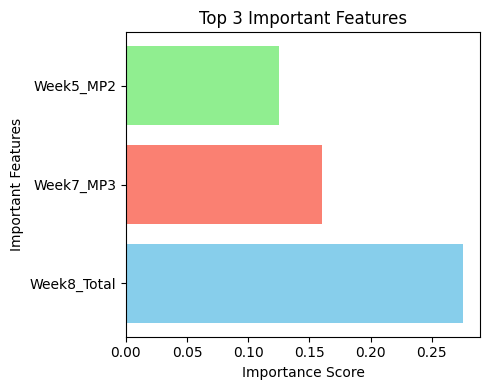

In [49]:

# Extract top 3 features and their scores
top_features = [col[0] for col in sorted_feature_importance_scores][:3]
top_scores = [col[1] for col in sorted_feature_importance_scores][:3]

# Define different colors for each feature
colors = ['skyblue', 'salmon', 'lightgreen']

# Create a horizontal bar plot
plt.figure(figsize=(5, 4))
plt.barh(top_features, top_scores, color=colors)
plt.xlabel('Importance Score')
plt.ylabel('Important Features')
plt.title('Top 3 Important Features')
plt.tight_layout()
plt.show()